In [3]:
import os
import nibabel as nib
from scipy import ndimage
from skimage import exposure, filters
import subprocess
from nilearn.image import resample_to_img
import matplotlib as plt
import matplotlib.pyplot as plt



In [4]:
# Setup FSL environment (for brain extraction)
# Ensure FSLDIR is set
os.environ['FSLDIR'] = '/usr/local/fsl'
os.environ['PATH'] = os.environ['FSLDIR'] + '/bin:' + os.environ['PATH']

# Set FSLOUTPUTTYPE environment variable
os.environ['FSLOUTPUTTYPE'] = 'NIFTI_GZ'



In [12]:
def load_and_show_sRMI(nifti_path, slice_index, slice_type='axial'):
    """
    Loads a NIfTI image and shows a specific slice in the desired plane.
    
    :param nifti_path: Path to the NIfTI file (.nii or .nii.gz).
    :param slice_index: Index of the slice you want to view.
    :param slice_type: Type of slice ('axial', 'sagittal' or 'coronal').
    """
    # Load the NIfTI image
    img = nib.load(nifti_path)
    data = img.get_fdata()
    
    # Check and show the slice in the specified plane
    if slice_type == 'axial':
        if slice_index < 0 or slice_index >= data.shape[2]:
            print(f"Index out of range for axial slice. It must be between 0 and {data.shape[2] - 1}.")
            return
        plt.imshow(data[:, :, slice_index], cmap="gray")
        plt.title(f"Axial Slice - Layer {slice_index}")
    
    elif slice_type == 'sagittal':
        if slice_index < 0 or slice_index >= data.shape[0]:
            print(f"Index out of range for sagittal slice. It must be between 0 and {data.shape[0] - 1}.")
            return
        plt.imshow(data[slice_index, :, :], cmap="gray")
        plt.title(f"Sagittal Slice - Layer {slice_index}")
    
    elif slice_type == 'coronal':
        if slice_index < 0 or slice_index >= data.shape[1]:
            print(f"Layer out of range for coronal slice. It must be between 0 and {data.shape[1] - 1}.")
            return
        plt.imshow(data[:, slice_index, :], cmap="gray")
        plt.title(f"Coronal Slice - Layer {slice_index}")
    
    else:
        print("Slice type not recognized. Use 'axial', 'sagittal', or 'coronal'.")
        return
    
    plt.axis("off")
    plt.show()

# Example usage

# Direct path to the NIfTI file from the current script's directory.
nifti_path = os.path.normpath('/InteligenciaArtificial-UdeA/paciente_no_pre_procesado/Subjet_Test_Preprocessed.nii)
# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'
# Call the function to load and display the slice
load_and_show_sRMI(nifti_path, slice_index, slice_type)


Reorientation complete and image saved as '../Data-Sets/ImgRaw_Biomarker_Processed/Reoriented/CTR_001_S2010_reoriented.nii.gz'.
Showing the slice of the reference image:


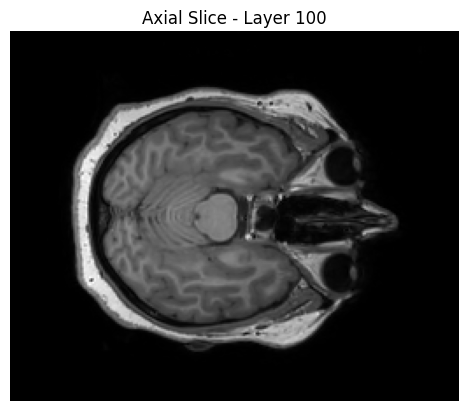


Showing the slice of the image to be reoriented:


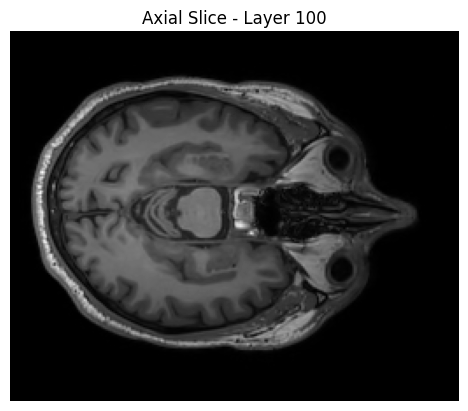


Showing the slice of the reoriented image:


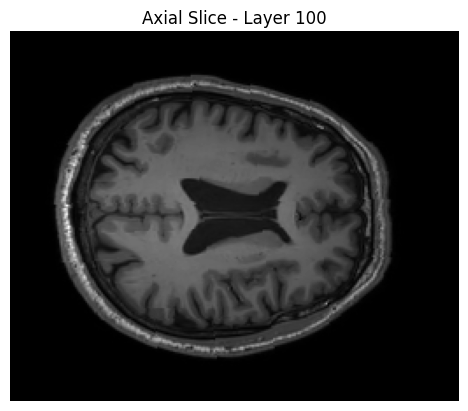

In [5]:
def reoriented_image(reference_image_path, image_to_reorient_path, output_path):
    """
    Reorient an image to the orientation of a reference image and save the result.
    
    Parameters:
    - reference_image_path (str): Path to the reference .nii file.
    - image_to_reorient_path (str): Path to the .nii file to be reoriented.
    - output_path (str): Path where the reoriented image will be saved.
    """
    # Verify if the files exist
    if not (os.path.exists(reference_image_path) and os.path.exists(image_to_reorient_path)):
        raise FileNotFoundError("One or both of the files were not found.")

    try:
        # Load the images
        image_to_reorient = nib.load(image_to_reorient_path)  # Image to be reoriented
        reference_image = nib.load(reference_image_path)  # Reference image
        # Reorient the image
        reoriented_img = resample_to_img(image_to_reorient, reference_image, interpolation='nearest')
        # Save the reoriented image
        reoriented_img.to_filename(output_path)

        print(f"Reorientation complete and image saved as '{output_path}'.")

    except Exception as e:
        print(f"Error loading the images or performing the reorientation: {e}")
        
# Define the file paths
reference_image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed.nii')
image_to_reorient_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed.nii')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_reoriented.nii.gz')

# Call the function to reorient the image
reoriented_image(reference_image_path, image_to_reorient_path, output_path)

# Display the slices to check the orientation
# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal' or 'coronal'

# Call the function to load and display the slices
print("Showing the slice of the reference image:")
load_and_show_sRMI(reference_image_path, slice_index, slice_type)

print("\nShowing the slice of the image to be reoriented:")
load_and_show_sRMI(image_to_reorient_path, slice_index, slice_type)

print("\nShowing the slice of the reoriented image:")
load_and_show_sRMI(output_path, slice_index, slice_type)


Displaying the slice of the reoriented image:


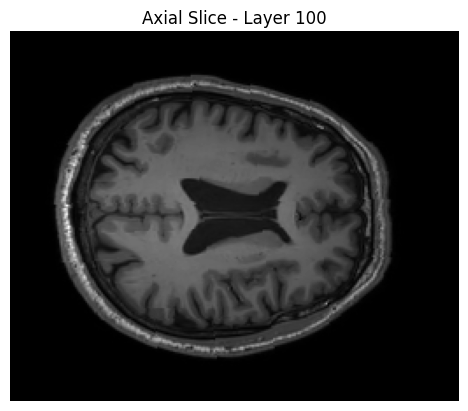


Displaying the slice of the normalized image:


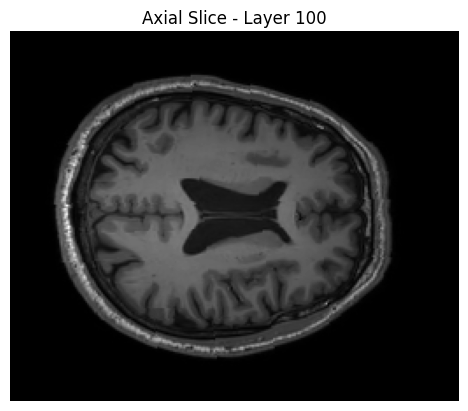

In [6]:
def normalize_image(image_path, output_path):
    """
    Loads a NIfTI image, normalizes its intensity, saves the normalized image, and displays slices of the original and normalized images.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to be normalized.
    - output_path : str
        Path to save the normalized image.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Normalize the image intensity
    normalized_data = exposure.rescale_intensity(image_data, out_range=(0, 1))
    
    # Create a new NIfTI object with the normalized data
    normalized_img = nib.Nifti1Image(normalized_data, img.affine, img.header)
    
    # Save the normalized image
    nib.save(normalized_img, output_path)
    
# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_reoriented.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_normalized.nii.gz')

# Call the function to normalize, save, and visualize the image
normalize_image(image_path, output_path)
# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the reoriented image:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the normalized image:")
load_and_show_sRMI(output_path, slice_index, slice_type)



Displaying the slice of the normalized image:


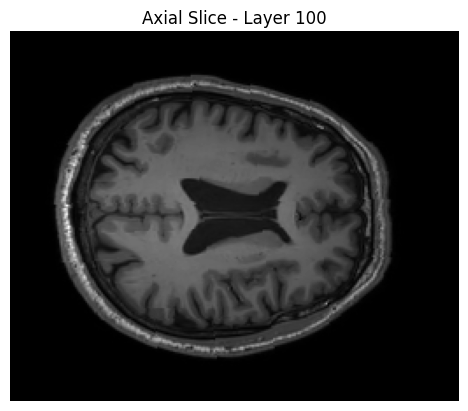


Displaying the slice of the image with median filter applied:


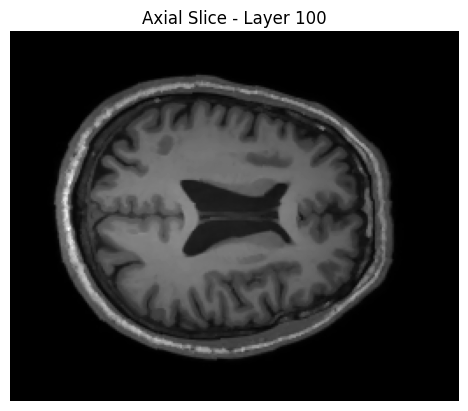

In [7]:
def median_filter_image(image_path, output_path, size=2):
    """
    Load a NIfTI image, apply a median filter, save the filtered image, and display slices of the original and filtered image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the filtered image.
    - size : int, optional
        Size of the median filter. The default value is 2.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the median filter
    filtered_data = ndimage.median_filter(image_data, size=size)
    
    # Create a new NIfTI object with the filtered data
    filtered_img = nib.Nifti1Image(filtered_data, img.affine, img.header)
    
    # Save the filtered image
    nib.save(filtered_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_normalized.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_filtered.nii.gz')

# Call the function to filter, save, and visualize the image
median_filter_image(image_path, output_path)


# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the normalized image:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the image with median filter applied:")
load_and_show_sRMI(output_path, slice_index, slice_type)


Displaying the slice of the image with median filter applied:


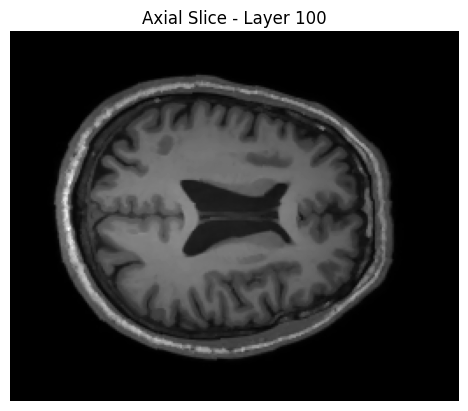


Displaying the slice of the smoothed image:


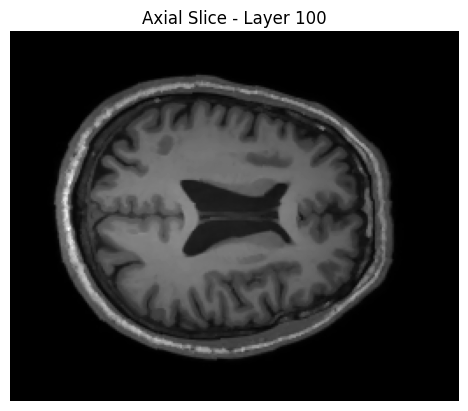

In [9]:
def apply_gaussian_filter(image_path, output_path, sigma=0.1):
    """
    Load a NIfTI image, apply a Gaussian filter, save the smoothed image, and display slices of the original and smoothed image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the smoothed image.
    - sigma : float, optional
        Standard deviation of the Gaussian filter. The default value is 0.1.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the Gaussian filter
    smoothed_data = ndimage.gaussian_filter(image_data, sigma=sigma)
    
    # Create a new NIfTI object with the smoothed data
    smoothed_img = nib.Nifti1Image(smoothed_data, img.affine, img.header)
    
    # Save the smoothed image
    nib.save(smoothed_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_filtered.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_smoothed.nii.gz')

# Call the function to apply the Gaussian filter, save, and visualize the image
apply_gaussian_filter(image_path, output_path)

# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the image with median filter applied:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the smoothed image:")
load_and_show_sRMI(output_path, slice_index, slice_type)


Displaying the slice of the image with smoothing applied:


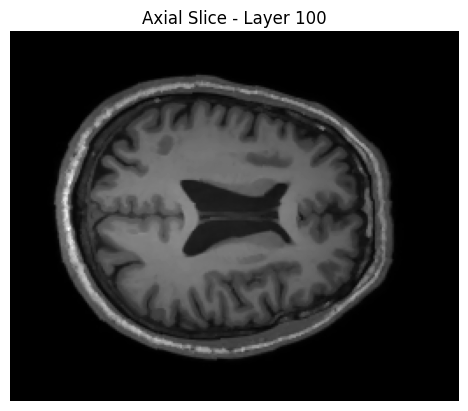


Displaying the slice of the enhanced image:


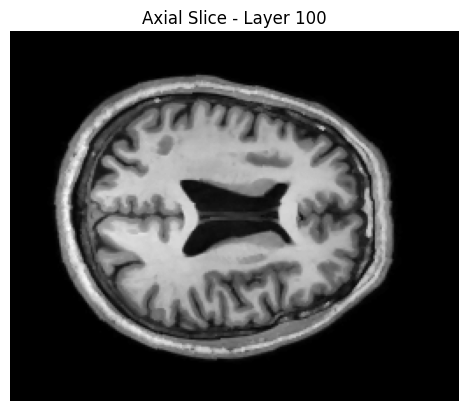

In [8]:
def adaptive_histogram_equalization(image_path, output_path, clip_limit=0.01):
    """
    Load a NIfTI image, apply adaptive histogram equalization, save the contrast-enhanced image, and display slices of the original and enhanced image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the contrast-enhanced image.
    - clip_limit : float, optional
        Clip limit for the adaptive equalization. The default value is 0.01.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply adaptive histogram equalization
    enhanced_data = exposure.equalize_adapthist(image_data, clip_limit=clip_limit)
    
    # Create a new NIfTI object with the enhanced contrast data
    enhanced_img = nib.Nifti1Image(enhanced_data, img.affine, img.header)
    
    # Save the contrast-enhanced image
    nib.save(enhanced_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_smoothed.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_enhanced.nii.gz')

# Call the function to apply adaptive equalization, save, and visualize the image
adaptive_histogram_equalization(image_path, output_path)

# Parameters for visualization
slice_index = 100           # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the image with smoothing applied:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the enhanced image:")
load_and_show_sRMI(output_path, slice_index, slice_type)


Displaying the slice of the image with smoothing applied:


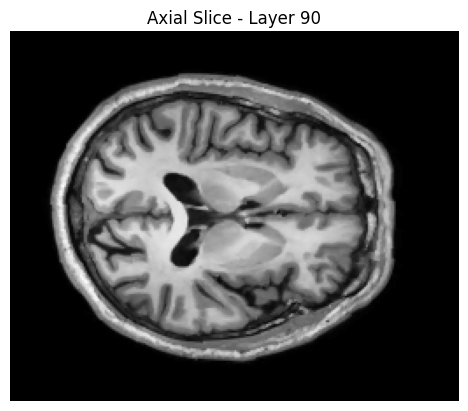


Displaying the slice of the edges image:


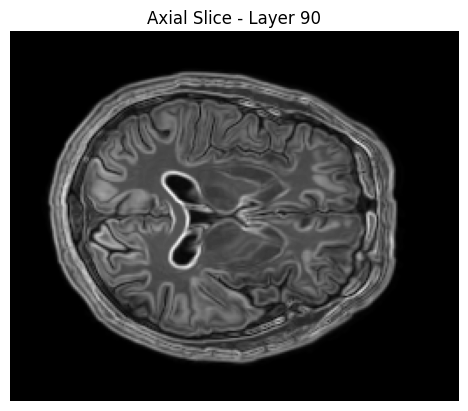

In [31]:
def enhance_edges(image_path, output_path, weight=1.5):
    """
    Load a NIfTI image, enhance the edges using the Sobel filter, save the image with enhanced edges, and display slices of the original and enhanced image.

    Parameters:
    - image_path : str
        Path to the NIfTI image file to process.
    - output_path : str
        Path to save the image with enhanced edges.
    - weight : float, optional
        Weight to add to the edge enhancement. The default value is 0.2.
    """
    # Load the NIfTI image
    img = nib.load(image_path)
    
    # Get the image data
    image_data = img.get_fdata()
    
    # Apply the Sobel filter to enhance the edges
    edges = filters.sobel(image_data)
    enhanced_data = image_data + weight * edges
    
    # Create a new NIfTI object with the enhanced edges
    enhanced_img = nib.Nifti1Image(enhanced_data, img.affine, img.header)
    
    # Save the image with enhanced edges
    nib.save(enhanced_img, output_path)
    

# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_enhanced.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_borders_edges.nii.gz')

# Call the function to enhance the edges, save, and visualize the image
enhance_edges(image_path, output_path)

# Parameters for visualization
slice_index = 90          # Index of the slice to display
slice_type = 'axial'        # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the image with smoothing applied:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the edges image:")
load_and_show_sRMI(output_path, slice_index, slice_type)


Mostrando el corte de la imagen aplicando enhance_edges:


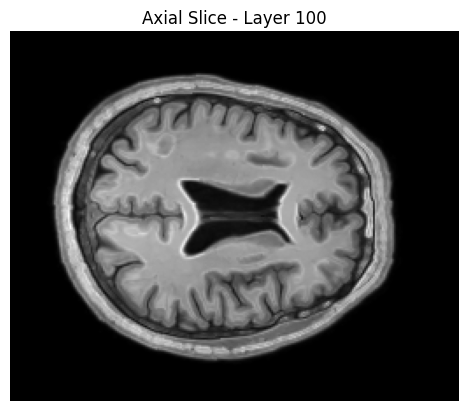


Mostrando el corte de la imagen aplicando normalizado:


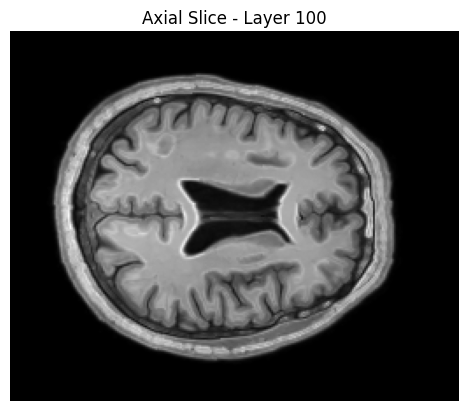

In [28]:
# Definir las rutas de los archivos
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_borders_edges.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_normalized_2.nii.gz')

# Llamar a la función para normalizar la imagen, guardar y visualizar la imagen
normalize_image(image_path, output_path)

# Parámetros para la visualización
corte_index = 100          # Índice del corte a visualizar
tipo_corte = 'axial'        # Cambia a 'axial', 'sagital' o 'coronal'

# Llamada a la función para cargar y mostrar los cortes
print("Mostrando el corte de la imagen aplicando enhance_edges:")
load_and_show_sRMI(image_path, corte_index, tipo_corte)

print("\nMostrando el corte de la imagen aplicando normalizado:")
load_and_show_sRMI(output_path, corte_index, tipo_corte)

Running command: bet /home/jp/Repositories/AI_Automatic_Tumor_Segmentation/DataBase/pre.nii.gz ghjghj.nii.gz -f 0.45 -g 0
Brain extraction completed. Output saved as ghjghj.nii.gz
Displaying the slice of the enhance_edges image:


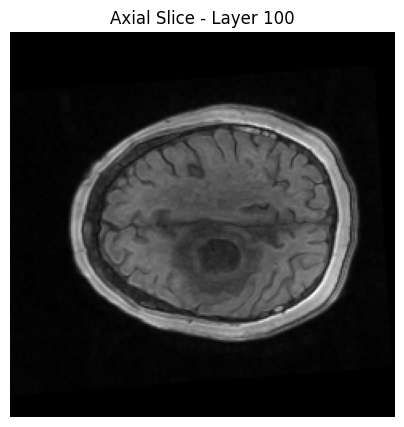


Displaying the slice of the skull stripping image:


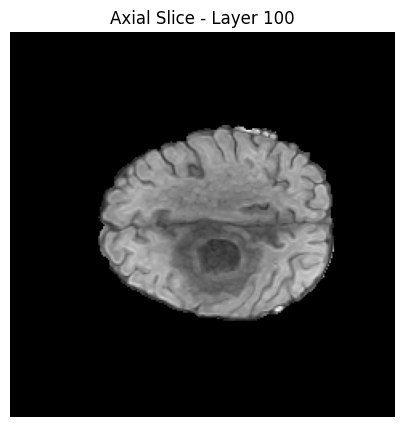

In [33]:
import os
import subprocess
import nibabel as nib
import matplotlib.pyplot as plt


# Function to perform skull stripping
def skull_stripping(input_image, output_image):
    command = [
        'bet', input_image, output_image,
        '-f', '0.45', '-g', '0'
    ]
    print(f"Running command: {' '.join(command)}")  # Added for debugging purposes
    result = subprocess.run(command, capture_output=True, text=True)
    if result.returncode == 0:
        print(f"Brain extraction completed. Output saved as {output_image}")
    else:
        print("Error in brain extraction:", result.stderr)

    # Remove temporary files if any
    base_output = os.path.splitext(output_image)[0]
    temp_files = [
        f"{base_output}_mask.nii.gz",
        f"{base_output}_skull.nii.gz",
        f"{base_output}_mask.nii",
        f"{base_output}_skull.nii"
    ]

    for temp_file in temp_files:
        if os.path.exists(temp_file):
            os.remove(temp_file)
            print(f"Removed temporary file: {temp_file}")


# Function to display the slices
def load_and_show_sRMI(nifti_path, slice_index, slice_type='axial'):
    img = nib.load(nifti_path)
    data = img.get_fdata()

    plt.figure(figsize=(5, 5))

    if slice_type == 'axial':
        plt.imshow(data[:, :, slice_index], cmap="gray")
        plt.title(f"Axial Slice - Layer {slice_index}")

    elif slice_type == 'sagittal':
        plt.imshow(data[slice_index, :, :], cmap="gray")
        plt.title(f"Sagittal Slice - Layer {slice_index}")

    elif slice_type == 'coronal':
        plt.imshow(data[:, slice_index, :], cmap="gray")
        plt.title(f"Coronal Slice - Layer {slice_index}")

    else:
        print("Slice type not recognized. Use 'axial', 'sagittal', or 'coronal'.")
        return

    plt.axis("off")
    plt.show()


# Define the file paths
image_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed.nii.gz')
output_path = os.path.normpath('/DataBase/Preprocessing/Subjet_Test_Preprocessed_final.nii.gz')

# Call the function
skull_stripping(image_path, output_path)

# Parameters for visualization
slice_index = 100  # Index of the slice to display
slice_type = 'axial'  # Change to 'axial', 'sagittal', or 'coronal'

# Call the function to load and display the slices
print("Displaying the slice of the enhance_edges image:")
load_and_show_sRMI(image_path, slice_index, slice_type)

print("\nDisplaying the slice of the skull stripping image:")
load_and_show_sRMI(output_path, slice_index, slice_type)


In [34]:
subprocess.run(['fsleyes', image_path, output_path])

CompletedProcess(args=['fsleyes', '/home/jp/Repositories/AI_Automatic_Tumor_Segmentation/DataBase/pre.nii.gz', 'ghjghj.nii.gz'], returncode=0)